Avaliação - Unidade 02
===

Identificação dos alunos (nome completo): 

- Este trabalho irá compor 40% da segunda unidade.
- Grupo de até dois alunos.
- Os alunos deverão enviar (apenas um por grupo) através do Sigaa, o notebook e os datasets gerados na avaliação em um arquivo compactado (.zip). 
- Todas as respostas devem ser realizadas através de código python e os resultados explicados em estilo markdown
- As informações (datasets) necessárias para resolução dos problemas podem ser encontradas em http://dados.ufrn.br/group/ensino


1. (1 ponto) Quantas e quais disciplinas com código IMD foram consolidadas em 2017.1? 
**Dica:** 
>```python
df[df['A'].str.contains("hello")]
```
2. (3 pontos) Realize um estudo envolvendo as propriedades de **assimétria** e **curtose** para as turmas IMD0033 (probabilidade) consolidadas em 2017.1. Utilize gráficos e explique os resultados. Reforce também os horários das disciplinas nos resultados. 
3. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos que descrevam as distribuições estatísticas (utilizar as funções **facetgrid** e **map**) de todas as turmas IMD0030 (Linguagem de Programação I) consolidas em 2017.1. Na análise, assuma como referência as médias finais e a situação dos alunos. 
4. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos de histograma referente as médias finais de todas as turmas IMD0029 (Estrutura de dados I) consolidadas em 2017.1. Incremente nos gráficos linhas que descrevam a média e mediana da distribuição. 

Importação e preparação dos dados
==

In [2]:
import pandas as pd


turmas_url = 'http://bit.do/turmas2017_1'
notas_url = 'http://bit.do/notas2017_1'

# turmas 2017.1
turmas = pd.read_csv(turmas_url, sep=';')

# matriculas em componentes
notas = pd.read_csv(notas_url, sep=';')

In [3]:
# verificando os dados das turmas
print(turmas.columns)
turmas.head()

Index(['id_turma', 'codigo', 'nome_ascii', 'docente_interno',
       'docente_externo', 'nivel_ensino', 'ano', 'periodo', 'capacidade_aluno',
       'local', 'data_inicio', 'data_fim', 'codigo_turma', 'descricao_horario',
       'observacao', 'distancia', 'tipo', 'data_consolidacao', 'agrupadora',
       'qtd_aulas_lancadas', 'situacao_turma', 'convenio',
       'modalidade_participantes', 'campus_turma', 'Unnamed: 24'],
      dtype='object')


,id_turma,codigo,nome_ascii,docente_interno,docente_externo,nivel_ensino,ano,periodo,capacidade_aluno,local,...,distancia,tipo,data_consolidacao,agrupadora,qtd_aulas_lancadas,situacao_turma,convenio,modalidade_participantes,campus_turma,Unnamed: 24
0,57593168,MUT0101,LINGUAGEM E ESTRUTURACAO MUSICAL I,6461327529e0404944cd1295b7f81b1f,NaN,TÉCNICO,2017,1,50.0,Sala 24,...,f,1,2017-07-03 19:50:39.259,f,26.0,CONSOLIDADA,NaN,Presencial,NaN,NaN
1,57593169,MUT0101,LINGUAGEM E ESTRUTURACAO MUSICAL I,f3db137cfe62d6556e92aadcee290b1c,NaN,TÉCNICO,2017,1,50.0,Sala 24,...,f,1,2017-07-05 08:17:47.229,f,34.0,CONSOLIDADA,NaN,Presencial,NaN,NaN
2,57593170,MUT0103,LINGUAGEM E ESTRUTURACAO MUSICAL III,f3db137cfe62d6556e92aadcee290b1c,NaN,TÉCNICO,2017,1,50.0,Sala 24,...,f,1,NaN,f,NaN,EXCLUÍDA,NaN,Presencial,NaN,NaN
3,57593172,MUT310,APRECIACAO MUSICAL I,40831b01609dda6af0b3083ec69fefcd,NaN,TÉCNICO,2017,1,30.0,Sala 25,...,f,1,NaN,f,NaN,EXCLUÍDA,NaN,Presencial,NaN,NaN
4,57593173,MUT477,ARRANJOS I,6a0f897c4c2000ff33a580db781815bd,NaN,TÉCNICO,2017,1,20.0,LAMUCO,...,f,1,2017-07-05 17:37:03.708,f,36.0,CONSOLIDADA,NaN,Presencial,NaN,NaN


In [4]:
# verificando os dados dos componentes curriculares
print(notas.columns)
notas.head()

Index(['id_turma', 'id_discente', 'id_curso', 'unidade', 'nota', 'reposicao',
       'faltas_unidade', 'media_final', 'numero_total_faltas', 'situacao'],
      dtype='object')


,id_turma,id_discente,id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,situacao
0,57597218,a7d1d2db85b7bcf16c5e77ce8bfdc7b3,2000057.0,3.0,9.0,f,0.0,7.4,0.0,APROVADO
1,57597218,a7d1d2db85b7bcf16c5e77ce8bfdc7b3,2000057.0,2.0,5.0,f,0.0,7.4,0.0,APROVADO
2,57597218,a7d1d2db85b7bcf16c5e77ce8bfdc7b3,2000057.0,1.0,8.1,f,0.0,7.4,0.0,APROVADO
3,57597218,4c3df36bd27088da2fc58954dd33abc0,2000057.0,3.0,9.5,f,0.0,8.5,0.0,APROVADO
4,57597218,4c3df36bd27088da2fc58954dd33abc0,2000057.0,2.0,7.0,f,0.0,8.5,0.0,APROVADO


In [5]:
# filtrando as turmas com código IMD
turmas_imd = turmas[turmas.codigo.str.contains("IMD")]

# utilizar apenas disciplinas com código "CONSOLIDADA"
turmas_imd = turmas_imd[turmas_imd.situacao_turma == 'CONSOLIDADA']

# resetar os idexes
turmas_imd.reset_index(drop=True, inplace=True)

# visualizar o novo dataset
turmas_imd.head()

,id_turma,codigo,nome_ascii,docente_interno,docente_externo,nivel_ensino,ano,periodo,capacidade_aluno,local,...,distancia,tipo,data_consolidacao,agrupadora,qtd_aulas_lancadas,situacao_turma,convenio,modalidade_participantes,campus_turma,Unnamed: 24
0,57597051,IMD0019,RESOLUCAO DE PROBLEMAS MATEMATICOS PARA TI,5e7d1e765af746bb22d3eb10f26919b8,NaN,GRADUAÇÃO,2017,1,83.0,B203 - CIVT,...,f,1,2017-07-08 12:27:45.88,f,209.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN
1,57597051,IMD0019,RESOLUCAO DE PROBLEMAS MATEMATICOS PARA TI,bb54c6e6fdf98c62c5e3ecad295d6347,NaN,GRADUAÇÃO,2017,1,83.0,B203 - CIVT,...,f,1,2017-07-08 12:27:45.88,f,209.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN
2,57597055,IMD0019,RESOLUCAO DE PROBLEMAS MATEMATICOS PARA TI,5e7d1e765af746bb22d3eb10f26919b8,NaN,GRADUAÇÃO,2017,1,81.0,B204 - CIVT,...,f,1,2017-07-04 20:15:57.185,f,220.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN
3,57597055,IMD0019,RESOLUCAO DE PROBLEMAS MATEMATICOS PARA TI,8733dedf2a1fc8440eb8f8ca21aa4d06,NaN,GRADUAÇÃO,2017,1,81.0,B204 - CIVT,...,f,1,2017-07-04 20:15:57.185,f,220.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN
4,57597057,IMD0019,RESOLUCAO DE PROBLEMAS MATEMATICOS PARA TI,bb54c6e6fdf98c62c5e3ecad295d6347,NaN,GRADUAÇÃO,2017,1,89.0,B204,...,f,1,2017-07-08 12:45:27.759,f,204.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN


### 1. (1 ponto) Quantas e quais disciplinas com código IMD foram consolidadas em 2017.1?


In [6]:
# Quantas turmas?
print('Total de turmas com código IMD consolidadas em 2017.1: %d' % (len(turmas_imd.id_turma.unique())))

# Quais turmas (limitei os nomes repetidos)
print(turmas_imd.nome_ascii.unique())

Total de turmas com código IMD consolidadas em 2017.1: 93
['RESOLUCAO DE PROBLEMAS MATEMATICOS PARA TI'
 'PRATICAS DE LEITURA E ESCRITA EM PORTUGUES I'
 'PRATICAS DE LEITURA EM INGLES' 'TECNOLOGIA DA INFORMACAO E SOCIEDADE'
 'INTRODUCAO AS TECNICAS DE PROGRAMACAO'
 'PRATICAS DE TECNICAS DE PROGRAMACAO' 'CALCULO DIFERENCIAL E INTEGRAL I'
 'PRATICAS DE LEITURA E ESCRITA EM PORTUGUES II'
 'FUNDAMENTOS MATEMATICOS DA COMPUTACAO I' 'VETORES E GEOMETRIA ANALITICA'
 'ESTRUTURA DE DADOS BASICAS I' 'LINGUAGEM DE PROGRAMACAO I'
 'PROBABILIDADE' 'FUNDAMENTOS MATEMATICOS DA COMPUTACAO II'
 'ESTRUTURAS DE DADOS BASICAS II' 'LINGUAGEM DE PROGRAMACAO II'
 'INTRODUCAO A ORGANIZACAO E ARQUITETURA DE COMPUTADORES'
 'TOPICOS ESPECIAIS EM TECNOLOGIA DA INFORMACAO VI'
 'SISTEMAS EMBARCADOS DE TEMPO REAL' 'TEORIA DE CIRCUITOS ELETRICOS'
 'SISTEMAS DIGITAIS RECONFIGURAVEIS'
 'METODOLOGIAS DE PROJETOS EM SISTEMAS EMBARCADOS' 'PROJETO INTEGRADO I'
 'TECNICAS DE PROTOTIPACAO E MONTAGEM DE CIRCUITOS E SISTEMAS E

### 2. (3 pontos) Realize um estudo envolvendo as propriedades de assimétria e curtose para as turmas IMD0033 (probabilidade) consolidadas em 2017.1. Utilize gráficos e explique os resultados. Reforce também os horários das disciplinas nos resultados.

In [7]:
# Fazendo um merge entre o dataframe turmas_imd e notas utilizando como base a coluna id_coluna
# https://pandas.pydata.org/pandas-docs/stable/merging.html
merge_imd = turmas_imd.merge(notas, on="id_turma", how='outer')

# Filtrar apenas as colunas que fazem sentido para o problema
merge_imd = merge_imd[['codigo','nome_ascii','descricao_horario','id_discente','media_final','situacao']]

# Filtrar a disciplina IMD0033
imd0033 = merge_imd[merge_imd['codigo'] == 'IMD0033']

# Apresentar o novo dataset
imd0033.head()

,codigo,nome_ascii,descricao_horario,id_discente,media_final,situacao
9790,IMD0033,PROBABILIDADE,24M12 (13/02/2017 - 01/07/2017),75053e51579b73374948d898cc9930a4,6.6,APROVADO POR NOTA
9791,IMD0033,PROBABILIDADE,24M12 (13/02/2017 - 01/07/2017),75053e51579b73374948d898cc9930a4,6.6,APROVADO POR NOTA
9792,IMD0033,PROBABILIDADE,24M12 (13/02/2017 - 01/07/2017),75053e51579b73374948d898cc9930a4,6.6,APROVADO POR NOTA
9793,IMD0033,PROBABILIDADE,24M12 (13/02/2017 - 01/07/2017),ea4a63695cd754f5003d50fbac8b3b5f,7.4,APROVADO
9794,IMD0033,PROBABILIDADE,24M12 (13/02/2017 - 01/07/2017),ea4a63695cd754f5003d50fbac8b3b5f,7.4,APROVADO


In [8]:
# Eliminar as linhas redundantes dos discentes
imd0033 = imd0033.drop_duplicates(subset='id_discente')

# Eliminar os alunos com situação 'CANCELADO'
imd0033 = imd0033[imd0033.situacao != 'CANCELADO']

# Verificar a existência de valores nulos
imd0033 = imd0033[~imd0033['media_final'].isnull()]

# Eliminate informação desnecessária 
# 24M12 (13/02/2017 - 01/07/2017) -> 24M12
imd0033.descricao_horario = imd0033.descricao_horario.apply(lambda x: x[:5])

# Visualizar o novo dataset
imd0033.head()

,codigo,nome_ascii,descricao_horario,id_discente,media_final,situacao
9790,IMD0033,PROBABILIDADE,24M12,75053e51579b73374948d898cc9930a4,6.6,APROVADO POR NOTA
9793,IMD0033,PROBABILIDADE,24M12,ea4a63695cd754f5003d50fbac8b3b5f,7.4,APROVADO
9796,IMD0033,PROBABILIDADE,24M12,4d622a566f40ecaec62dbcf8fd4d4691,5.9,APROVADO POR NOTA
9802,IMD0033,PROBABILIDADE,24M12,7c3574b713e386ae7f8b7ed9ef67ff29,6.8,APROVADO POR NOTA
9805,IMD0033,PROBABILIDADE,24M12,374336aa77a8708d73df7d4fb7652d65,3.7,REPROVADO


In [9]:
from scipy.stats import skew,kurtosis

skewness = []
kurtosiness = []

# Calcular o skew e kurtosis para cada turma (horários diferentes)
for horario in imd0033.descricao_horario.unique():
    skewness.append(skew(imd0033[imd0033['descricao_horario'] == horario]['media_final']))
    kurtosiness.append(kurtosis(imd0033[imd0033['descricao_horario'] == horario]['media_final']))

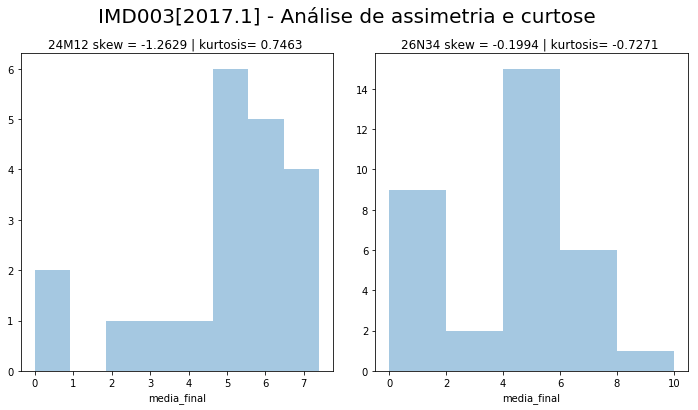

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando a figura
fig, (ax1,ax2) = plt.subplots(figsize=(10,5), ncols=2, nrows=1)

# Lista de eixos
eixos = [ax1, ax2]

# Lista de amostras
amostras = []

# Configurar os espaços entre as figuras
fig.tight_layout()

# Título da figura
plt.suptitle("IMD003[2017.1] - Análise de assimetria e curtose", 
             fontsize=20,
            y = 1.09)

# Margem do título
y_title_margin = 1

for i,horario in enumerate(imd0033.descricao_horario.unique()):
    # Títulos dos subplots
    eixos[i].set_title("%s skew = %.4f | kurtosis= %.4f "% (horario,skewness[i],kurtosiness[i]), 
              y = y_title_margin, fontsize=12)
    amostras.append(imd0033[imd0033['descricao_horario'] == horario]['media_final'])

# Gerando as distribuições com o Seaborn    
sns.distplot(amostras[0], kde = False, ax=ax1)
sns.distplot(amostras[1], kde = False, ax=ax2)

plt.show()

### (3 pontos) Utilize a biblioteca seaborn para traçar gráficos que descrevam as distribuições estatísticas (utilizar as funções facetgrid e map) de todas as turmas IMD0030 (Linguagem de Programação I) consolidas em 2017.1. Na análise, assuma como referência as médias finais e a situação dos alunos.

In [11]:
# Filtrar a disciplina IMD0030
imd0030 = merge_imd[merge_imd['codigo'] == 'IMD0030']

# Eliminar as linhas redundantes dos discentes
imd0030 = imd0030.drop_duplicates(subset='id_discente')

# Eliminar os alunos com situação 'CANCELADO'
imd0030 = imd0030[imd0030.situacao != 'CANCELADO']

# Verificar a existência de valores nulos
imd0030 = imd0030[~imd0030['media_final'].isnull()]

# Eliminate informação desnecessária 
# 24M12 (13/02/2017 - 01/07/2017) -> 24M12
imd0030.descricao_horario = imd0030.descricao_horario.apply(lambda x: x[:5])

# Visualizar o novo dataset
imd0030.head()

,codigo,nome_ascii,descricao_horario,id_discente,media_final,situacao
8943,IMD0030,LINGUAGEM DE PROGRAMACAO I,35M34,374336aa77a8708d73df7d4fb7652d65,7.3,APROVADO
8949,IMD0030,LINGUAGEM DE PROGRAMACAO I,35M34,75053e51579b73374948d898cc9930a4,10.0,APROVADO
8952,IMD0030,LINGUAGEM DE PROGRAMACAO I,35M34,8fd1e748ee214a4df6a7d532de3b2014,8.3,APROVADO
8961,IMD0030,LINGUAGEM DE PROGRAMACAO I,35M34,5687a6e3e176076b575213fd55d92456,7.7,APROVADO
8964,IMD0030,LINGUAGEM DE PROGRAMACAO I,35M34,65fbb3b9d43b87dadafe8c024e7a160f,5.2,APROVADO POR NOTA


In [12]:
imd0030.media_final = pd.to_numeric(imd0030['media_final'])

In [13]:
imd0030.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 8943 to 13825
Data columns (total 6 columns):
codigo               94 non-null object
nome_ascii           94 non-null object
descricao_horario    94 non-null object
id_discente          94 non-null object
media_final          94 non-null float64
situacao             94 non-null object
dtypes: float64(1), object(5)
memory usage: 5.1+ KB


/home/ilsinhosantos/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/ilsinhosantos/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/ilsinhosantos/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ilsinhosantos/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


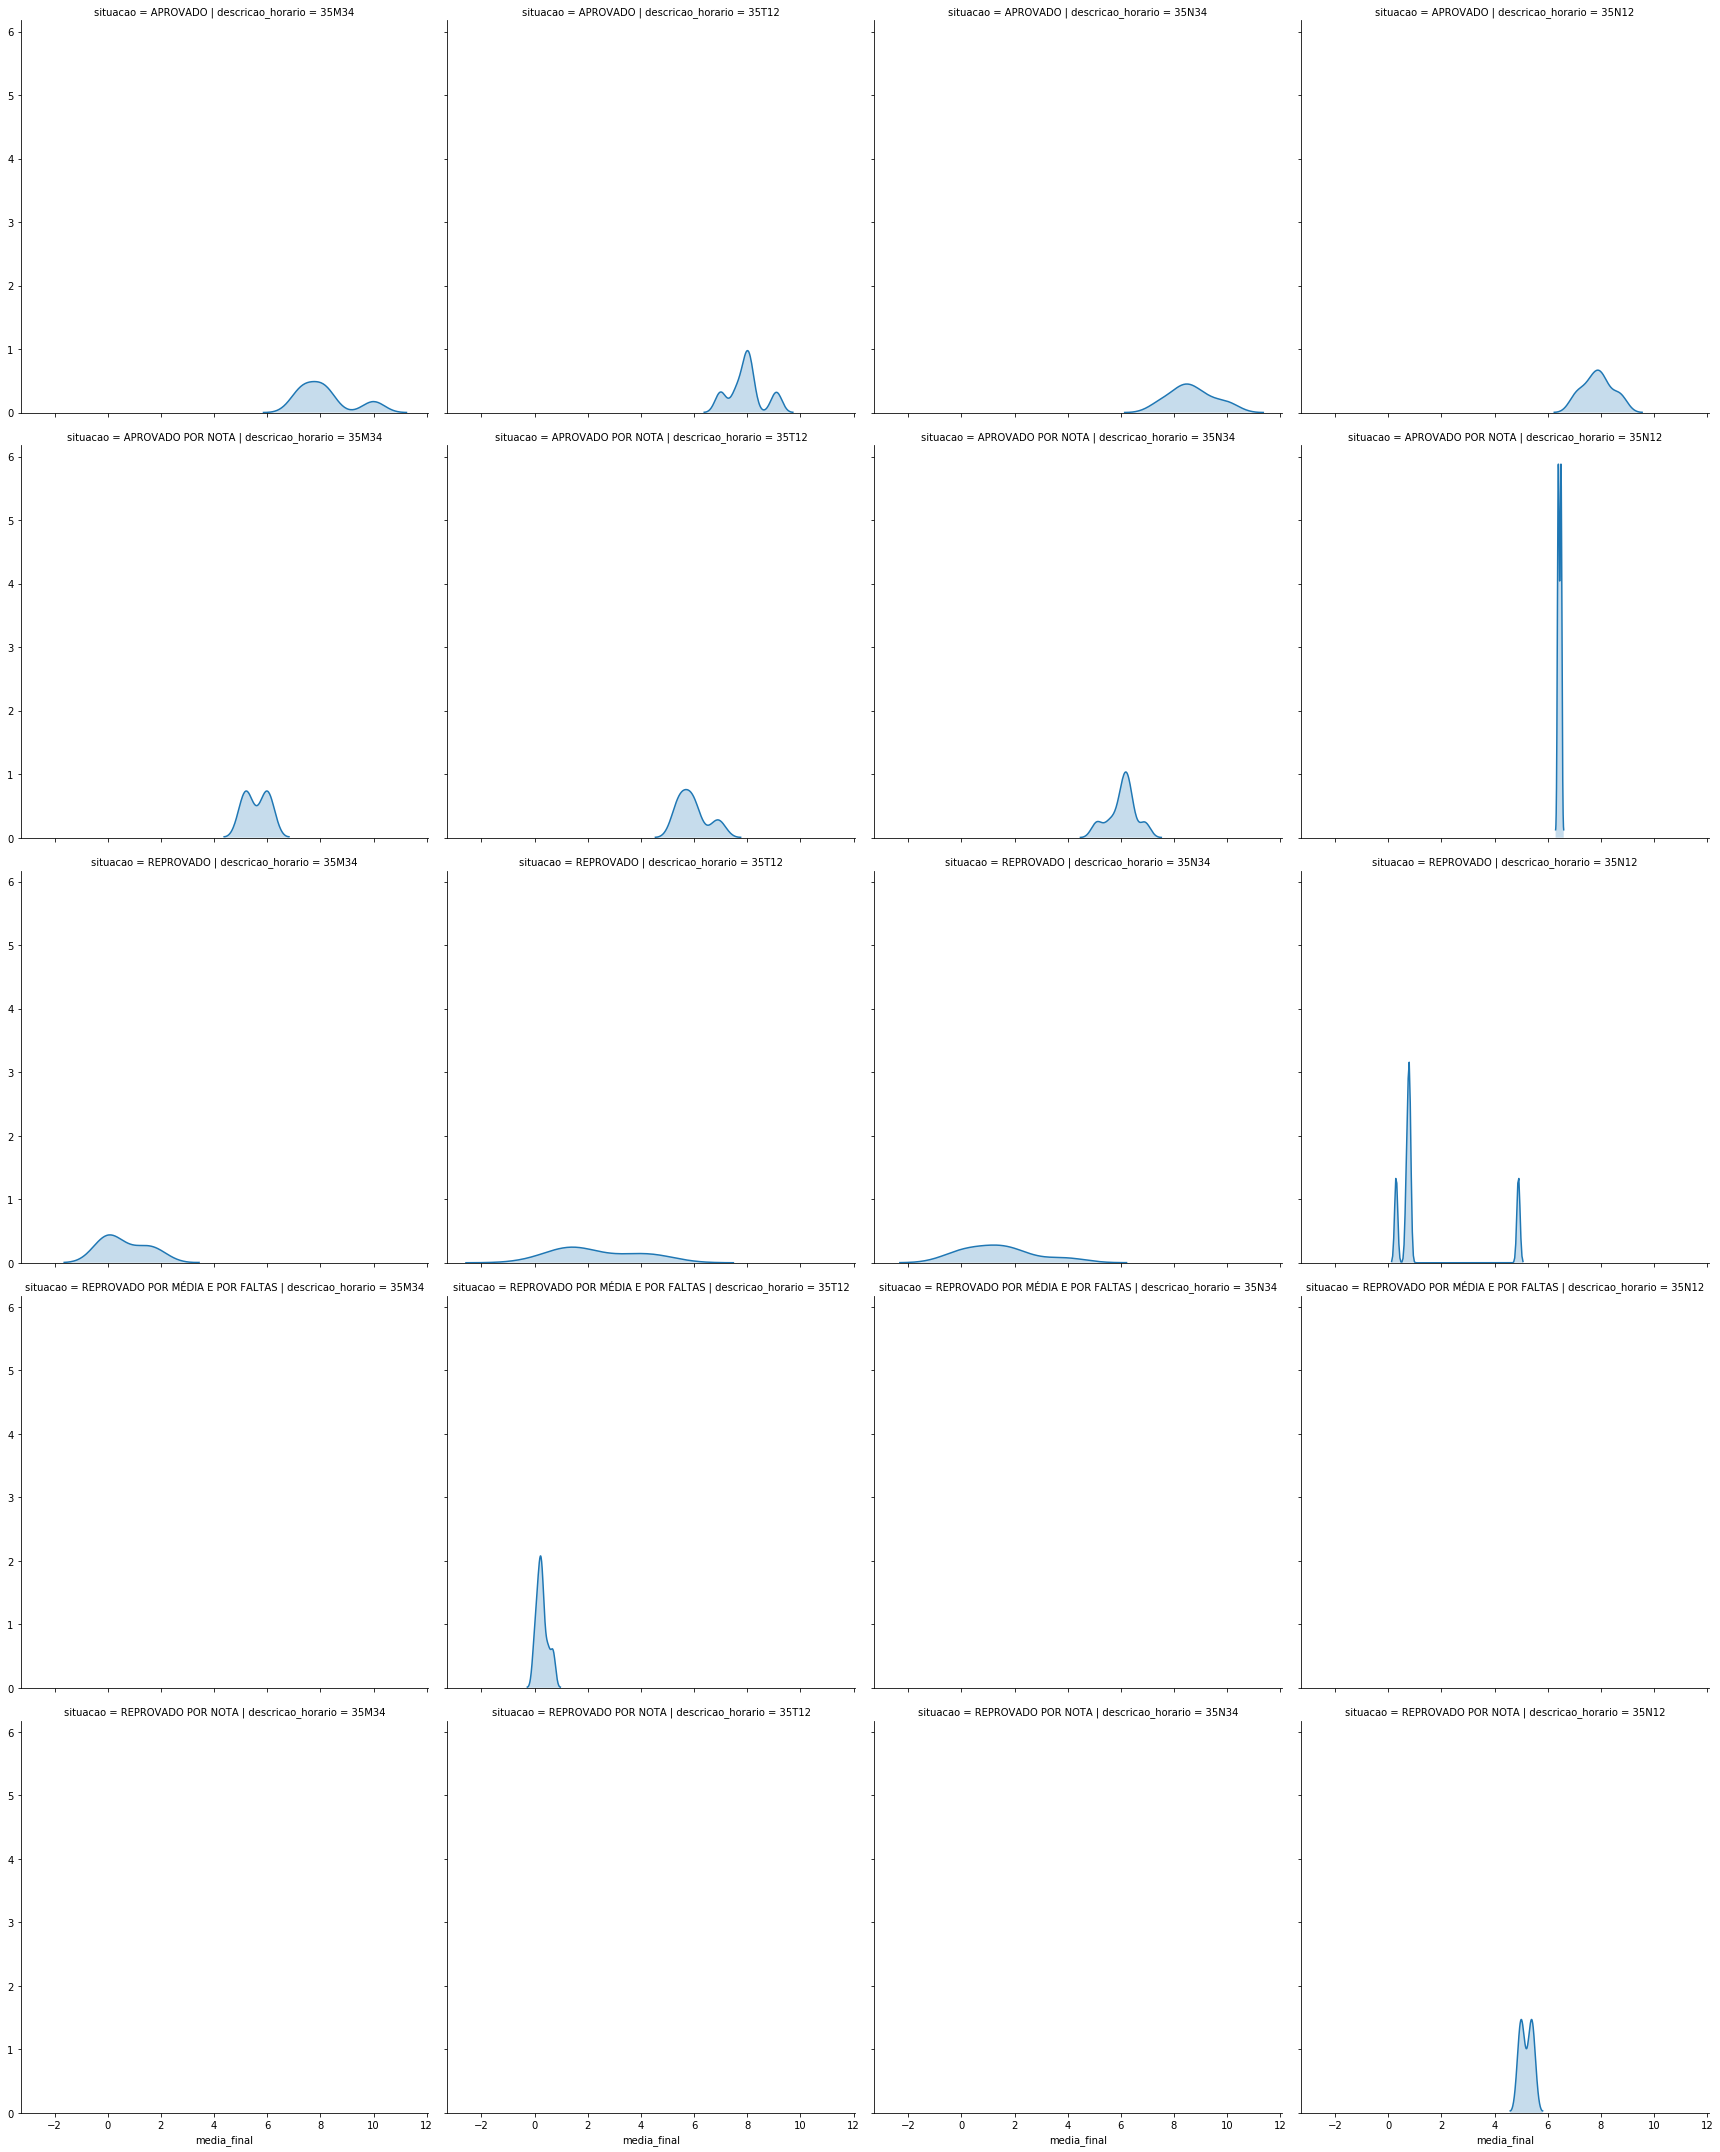

In [14]:
# Colunas serão os horários, as linhas a situação do aluno
#g = sns.FacetGrid(imd0030, col="descricao_horario", row='situacao',size=6)
g = sns.FacetGrid(imd0030, col="descricao_horario", row='situacao',size=6)

# O eixo x será as notas dos alunos
# g.map(plt.hist, "media_final")
g.map(sns.kdeplot, "media_final", shade=True)

# Plot the graph
plt.show()

### 4. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos de histograma referente as médias finais de todas as turmas IMD0029 (Estrutura de dados I) consolidadas em 2017.1. Incremente nos gráficos linhas que descrevam a média e mediana da distribuição.

In [15]:
# Filtrar a disciplina IMD0030
imd0029 = merge_imd[merge_imd['codigo'] == 'IMD0029']

# Eliminar as linhas redundantes dos discentes
imd0029 = imd0029.drop_duplicates(subset='id_discente')

# Eliminar os alunos com situação 'CANCELADO'
imd0029 = imd0029[imd0029.situacao != 'CANCELADO']

# Verificar a existência de valores nulos
imd0029 = imd0029[~imd0029['media_final'].isnull()]

# Eliminate informação desnecessária 
# 24M12 (13/02/2017 - 01/07/2017) -> 24M12
imd0029.descricao_horario = imd0029.descricao_horario.apply(lambda x: x[:5])

# Visualizar o novo dataset
imd0029.head()

,codigo,nome_ascii,descricao_horario,id_discente,media_final,situacao
8582,IMD0029,ESTRUTURA DE DADOS BASICAS I,35M12,75053e51579b73374948d898cc9930a4,8.1,APROVADO
8585,IMD0029,ESTRUTURA DE DADOS BASICAS I,35M12,65fbb3b9d43b87dadafe8c024e7a160f,6.0,APROVADO POR NOTA
8588,IMD0029,ESTRUTURA DE DADOS BASICAS I,35M12,8fd1e748ee214a4df6a7d532de3b2014,6.1,APROVADO POR NOTA
8597,IMD0029,ESTRUTURA DE DADOS BASICAS I,35M12,ebd53acaa5961bfaa40d32a9b6f6484b,6.3,APROVADO POR NOTA
8603,IMD0029,ESTRUTURA DE DADOS BASICAS I,35M12,5687a6e3e176076b575213fd55d92456,7.0,APROVADO


In [16]:
def vertical_mean_line(x,**kwargs):
    plt.axvline(x.mean(),color="g")
    
def vertical_median_line(x,**kwargs):
    plt.axvline(x.median(),color="r")

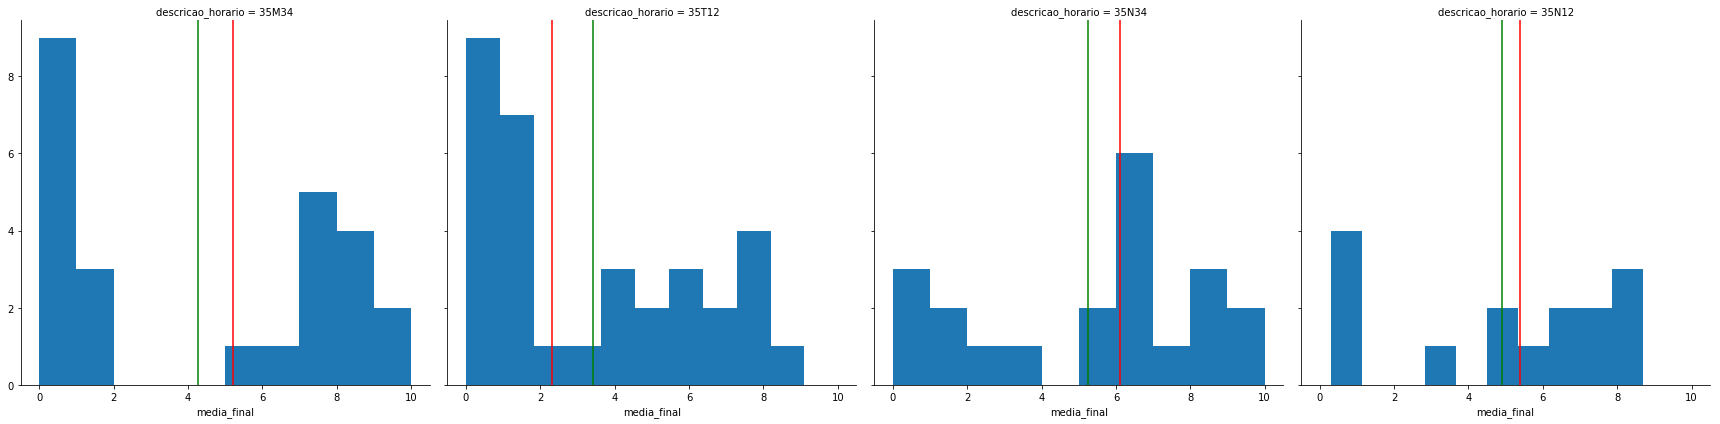

In [17]:
# Colunas serão os horários, as linhas a situação do aluno
g = sns.FacetGrid(imd0030, col="descricao_horario",size=6)

# O eixo x será as notas dos alunos
g.map(plt.hist, "media_final")

# Plotando linhas verticais com a média (verde) e mediana (vermelho) 
g.map(vertical_mean_line, "media_final")
g.map(vertical_median_line, "media_final")


# Plot the graph
plt.show()